## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

study_results_df.head(), mouse_metadata_df.head()

(  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
 0     b128          0                45.0                 0
 1     f932          0                45.0                 0
 2     g107          0                45.0                 0
 3     a457          0                45.0                 0
 4     c819          0                45.0                 0,
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
 0     k403     Ramicane    Male          21          16
 1     s185    Capomulin  Female           3          17
 2     x401    Capomulin  Female          16          15
 3     m601    Capomulin    Male          22          17
 4     g791     Ramicane    Male          11          16)

In [2]:

# Combine the data into a single dataset
complete_study_results_df = pd.merge(study_results_df, mouse_metadata_df, how="left", on=['Mouse ID', 'Mouse ID'])
complete_study_results_df.head(15)  ## ------ .tail() to see the last ones
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
print(complete_study_results_df.dtypes)
complete_study_results_df.info()
complete_study_results_df.columns

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [4]:
# Checking the number of mice.
number = complete_study_results_df['Mouse ID'].nunique() # =------ .nunique() gives us the number
len(complete_study_results_df['Mouse ID'].unique()) #-------- also get the number of unique mice

pd.DataFrame([[number]], columns = ["Mice"])

,Mice
0,249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# complete_study_results_df.loc[complete_study_results_df['Mouse ID'] == 'g989']  # --- --- check for mice dpluactes



pd.DataFrame(complete_study_results_df.loc[complete_study_results_df.duplicated(
    subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique())
#len(complete_study_results_df['Mouse ID'].unique())do 



,0
0,g989


In [6]:
complete_study_results_df.count()  # ------ oriignal count for mouse ID

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_study_results_df.loc[complete_study_results_df['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = complete_study_results_df.loc[complete_study_results_df['Mouse ID'] != 'g989']
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_number = clean_data_df["Mouse ID"].nunique()
pd.DataFrame([[clean_number]], columns = ["Mice"])

,Mice
0,248


## Summary Statistics

In [10]:
clean_data_df['Drug Regimen'].value_counts() # ------ looking of each regimen and the their sums

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stds = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

summary_stats_tbl_df = pd.DataFrame({"Mean Tumor Volume": means,
                                     "Median Tumor Volume": medians,
                                     "Tumor Volume Variance": variances,
                                     "Tumor Volume Std. Dev.": stds,
                                     "Tumor Volume Std. Err.": sems})
summary_stats_tbl_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# clean_data_df.groupby('Drug Regimen').agg(['mean'])["Tumor Volume (mm3)"]  # ---------- checking my work

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(MeanTumorVolume='mean',
                                                             MedianTumorVolume='median',
                                                             TumorVolumeVariance='var',
                                                             TumorVolumeStdDev='std',
                                                             TumorVolumeStdErr='sem')

,MeanTumorVolume,MedianTumorVolume,TumorVolumeVariance,TumorVolumeStdDev,TumorVolumeStdErr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
#Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       #'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

Text(0, 0.5, 'Total Timepoints')

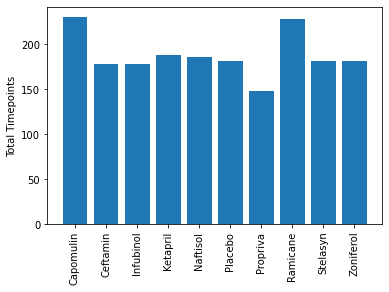

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

tot_time_regi_df = (pd.DataFrame(clean_data_df.groupby(['Drug Regimen']).count()['Timepoint'])).reset_index()
tot_time_regi_df

x_axis = np.arange(len(tot_time_regi_df))


plt.bar(x_axis, tot_time_regi_df['Timepoint'])
plt.xticks(x_axis, tot_time_regi_df['Drug Regimen'], rotation="vertical")
plt.ylabel("Total Timepoints")


# ----------https://www.youtube.com/watch?v=iedmZlFxjfA

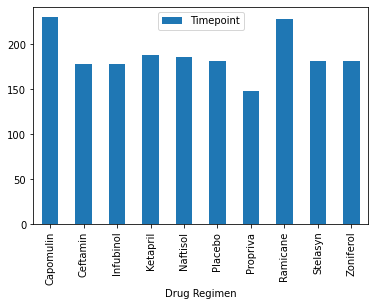

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tot_time_regi_df.plot.bar("Drug Regimen", "Timepoint")


In [ ]:
# time_mice_regi = pd.DataFrame(clean_data_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].count())#['Drug Regimen']=clean_data_df['Drug Regimen']
# time_mice_regi_df = time_mice_regi.reset_index()
# time_mice_regi_df

# cap_mice = time_mice_regi_df.loc[time_mice_regi_df['Drug Regimen'] == 'Capomulin']

# mice_from_cap = cap_mice['Mouse ID'].values  # ------https://www.youtube.com/watch?v=hpPDVP1TbF0
# mice_from_cap

# time_from_cap = cap_mice['Timepoint'].values
# time_from_cap

# timepoints = time_from_cap
# x_axis = len(mice_from_cap)

# plt.bar(mice_from_cap, timepoints)

# cap_bar = time_mice_regi_df.loc[time_mice_regi_df["Drug Regimen"] == "Capomulin",:]
# cap_bar

In [ ]:
# verifying data with first output
# complete_study_results_df.loc[complete_study_results_df['Mouse ID'] == 'a203']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E84784FD0>],
      dtype=object)

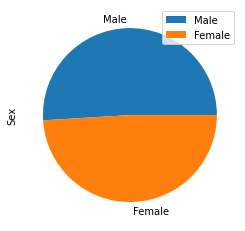

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# ---------https://datascienceparichay.com/article/create-a-pie-chart-of-pandas-series-values/
m_f_mice = pd.DataFrame(clean_data_df['Sex'].value_counts())
m_f_mice
m_f_mice.plot(kind='pie', subplots=True)

([<matplotlib.patches.Wedge at 0x16e8480ed30>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

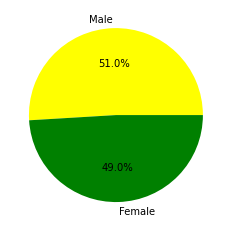

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
gender_count = [958,922]
colors = ["yellow","green"]
explode = (0,0)
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,autopct="%1.1f%%")

In [ ]:
# final_tumor = pd.DataFrame(clean_data_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint', 'Tumor Volume (mm3)'].max())
# ------not a working formula becasue it has max volume.

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane",:]
infu_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Infubinol",:]
ceft_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ceftamin",:]

In [34]:
# Start by getting the last (greatest) timepoint for each mouse
cap_maxtime = cap_df.groupby(['Mouse ID']).max()['Timepoint']
capomulin_df = pd.DataFrame(cap_maxtime)

ram_maxtime = ram_df.groupby(['Mouse ID']).max()['Timepoint']
ramicane_df = pd.DataFrame(ram_maxtime)

infu_maxtime = infu_df.groupby(['Mouse ID']).max()['Timepoint']
infubinol_df = pd.DataFrame(infu_maxtime)

ceft_maxtime = ceft_df.groupby(['Mouse ID']).max()['Timepoint']
ceftamin_df = pd.DataFrame(ceft_maxtime)


In [35]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_tum_vol_last_time_df = pd.merge(capomulin_df, clean_data_df, how="left", on=['Mouse ID', 'Timepoint'])

ram_tum_vol_last_time_df = pd.merge(ramicane_df, clean_data_df, how="left", on=['Mouse ID', 'Timepoint'])

infu_tum_vol_last_time_df = pd.merge(infubinol_df, clean_data_df, how="left", on=['Mouse ID', 'Timepoint'])

ceft_tum_vol_last_time_df = pd.merge(ceftamin_df, clean_data_df, how="left", on=['Mouse ID', 'Timepoint'])


In [ ]:
# cap_max = cap_df.groupby(['Mouse ID']).max()['Tumor Volume (mm3)']
# cap_last, cap_max
# -------run this to compare that max time and max volume are not on the same row.(See w150 - row21)---------#

In [ ]:
# greatest_time = pd.DataFrame(clean_data_df.groupby(['Mouse ID'])['Timepoint'].max())
# greatest_volume = pd.DataFrame(clean_data_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].max())
# # final_tumor_volume = final_tumor.loc[final_tumor['Drug Regimen'].isin(['Capomulin''Ramicane', 'Infubinol', 'Ceftamin'])]
# final_tumor
# #final_tumor_df.head()  # -------https://stackoverflow.com/questions/57858807/how-to-use-loc-on-to-filter-on-multiple-values

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
